In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import KFold;
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv(r'D:\Documents\ML\HR_comma_sep.csv')

In [3]:
data.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
2464,0.78,0.97,4,142,3,0,0,0,sales,low
12849,0.74,0.87,5,264,3,0,0,0,accounting,high
10141,0.68,0.69,3,148,2,0,0,0,IT,low
5696,0.48,0.54,4,105,5,1,0,0,support,low
4503,0.95,0.96,5,175,3,1,0,1,RandD,medium
3422,0.88,0.66,4,271,3,1,0,0,IT,medium
9655,0.60,0.72,3,181,2,0,0,0,technical,medium
961,0.73,0.83,5,270,5,1,1,0,support,medium
6485,0.63,1.00,5,241,4,0,0,0,RandD,medium
7220,0.80,0.94,3,150,3,0,0,0,technical,medium


In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data= pd.get_dummies(data,columns =['salary','sales'])

In [7]:
data.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
9554,0.62,0.68,3,134,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3055,0.67,0.68,3,189,3,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1127,0.10,0.85,7,261,4,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7699,0.49,0.80,3,238,4,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8890,0.58,0.61,4,200,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
10430,0.71,0.36,2,132,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4972,0.63,0.80,4,243,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6318,0.83,0.64,4,210,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1084,0.77,0.83,4,245,5,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12950,0.69,0.75,5,196,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
front = data['left']
data.drop(labels=['left'], axis=1,inplace = True)
data.insert(0, 'left', front)
data.sample(10)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
13189,0,0.81,0.55,3,199,2,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12430,1,0.89,0.65,5,195,6,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4412,0,0.55,0.93,4,239,4,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7280,0,0.61,0.82,3,157,2,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
10057,0,0.72,0.65,3,109,5,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
14232,1,0.38,0.55,2,147,3,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
11121,0,0.53,0.91,5,181,3,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4348,0,0.78,0.92,5,242,4,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3313,0,0.53,0.73,4,227,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12485,1,0.32,0.95,5,172,2,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [21]:
x,y = data.loc[:,data.columns != 'left'], data.loc[:,'left']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=7) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=7) accuracy is:  0.934666666667


In [20]:
data[['left','average_montly_hours']].groupby(['left']).mean()

,average_montly_hours
left,
0,199.060203
1,207.419210


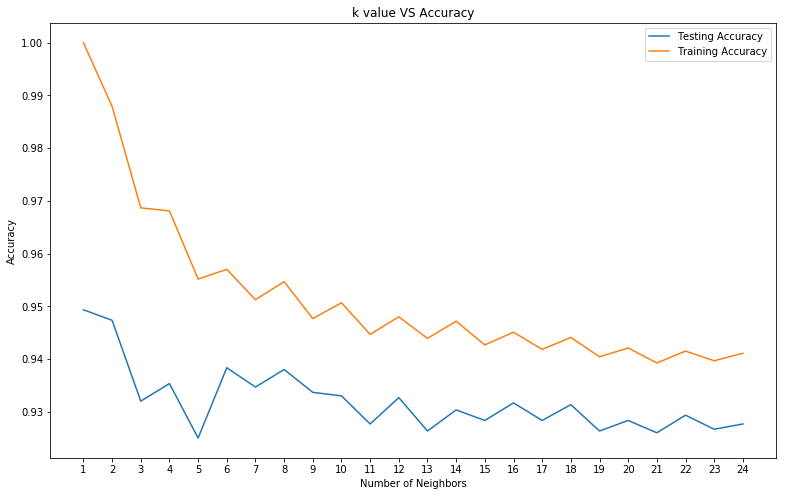

Best accuracy is 0.9493333333333334 with K = 1


In [22]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [34]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(data[['average_montly_hours','time_spend_company']])
df_std = std_scale.transform(data[['average_montly_hours','time_spend_company']])

minmax_scale = preprocessing.MinMaxScaler().fit(data[['average_montly_hours','time_spend_company']])
df_minmax = minmax_scale.transform(data[['average_montly_hours','time_spend_company']])

In [51]:
data['average_montly_hours']= (data['average_montly_hours']-hours_min)/(hours_max-hours_min)

In [57]:
data.sample(10)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
6692,0,0.80,0.38,0.2,0.556075,0.500,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7792,0,0.83,0.68,0.4,0.476636,0.125,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14789,1,0.90,0.96,0.6,0.686916,0.375,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8385,0,0.66,0.51,0.8,0.042056,0.250,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3398,0,0.64,0.50,0.2,0.663551,0.250,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
658,1,0.38,0.53,0.0,0.233645,0.125,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
11212,0,0.97,0.55,0.6,0.542056,0.500,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
652,1,0.09,0.77,0.8,0.906542,0.250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10369,0,0.86,0.59,0.4,0.434579,0.000,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
10560,0,0.92,0.40,0.0,0.663551,0.125,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [53]:
data['number_project']= (data['number_project']-data['number_project'].min())/(data['number_project'].max()-data['number_project'].min())

In [56]:
data['time_spend_company']=(data['time_spend_company']-data['time_spend_company'].min())/(data['time_spend_company'].max()-data['time_spend_company'].min())

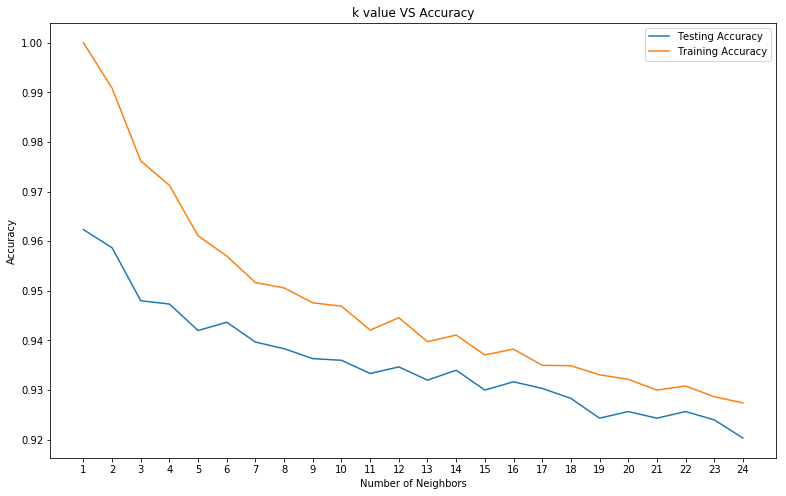

Best accuracy with min-max scaling is 0.9623333333333334 with K = 1


In [59]:
x_1,y_1= data.loc[:,data.columns != 'left'], data.loc[:,'left']

from sklearn.model_selection import train_test_split
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(x_1,y_1,test_size = 0.2,random_state = 3)

neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train_1,y_train_1)
    #train accuracy
    train_accuracy.append(knn.score(x_train_1, y_train_1))
    # test accuracy
    test_accuracy.append(knn.score(x_test_1, y_test_1))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy with min-max scaling is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train_1,y_train_1)
prediction = knn.predict(x_test_1)
print('With KNN (K=7) accuracy is: ',knn.score(x_test_1,y_test_1)) # accuracy

With KNN (K=7) accuracy is:  0.939666666667


In [61]:
from sklearn.tree import DecisionTreeClassifier

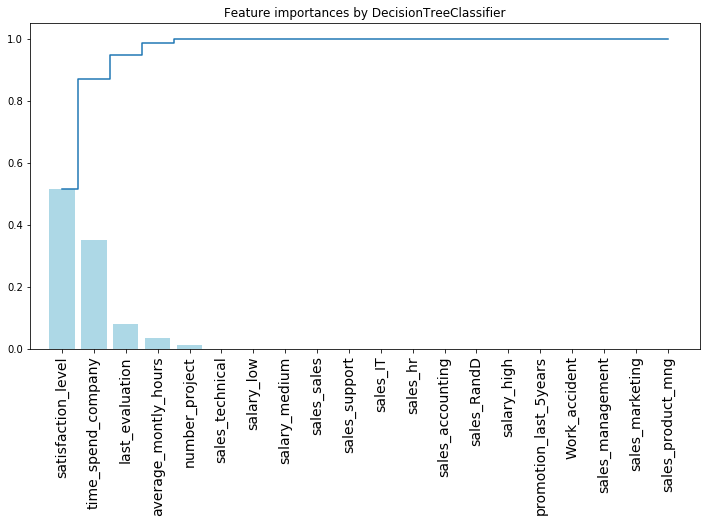

In [62]:
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(x_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = data.drop(['left'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [80]:
print('With dtree accuracy is: ',dtree.score(x_test,y_test))

With dtree accuracy is:  0.965333333333


In [78]:
dtree = tree.DecisionTreeClassifier(
    max_depth=10,
    class_weight="balanced",
    min_weight_fraction_leaf=0.005
    )
dtree = dtree.fit(x_train,y_train)

In [81]:
dtree_1 = tree.DecisionTreeClassifier(
    max_depth=10,
    class_weight="balanced",
    min_weight_fraction_leaf=0.005
    )
dtree_1 = dtree.fit(x_train_1,y_train_1)

In [82]:
print('With dtree accuracy is: ',dtree_1.score(x_test_1,y_test_1))

With dtree accuracy is:  0.972


In [10]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

In [11]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) 

In [12]:
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [13]:
MLA_predict = data['left']

In [24]:
row_index = 0
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate

    #MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    #MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    #MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    #MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(x_train,y_train)
    MLA_predict[MLA_name] = alg.predict(y_test)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

ValueError: Unknown label type: 'unknown'